## Problem definition 
Predict housing prices in California districts using a dataset from https://www.kaggle.com/datasets/camnugent/california-housing-prices. Explore different machine learning models and hyperparameters to build accurate predictive models. In this project, I want to apply the concepts I learned from the 'Hands-On Machine Learning With Scikit-Learn, Keras, And Tensorflow' book by Geron Aurelien.

## Import Libraries

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration and Preprocessing

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note: There are 207 Null values in total_bedrooms.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

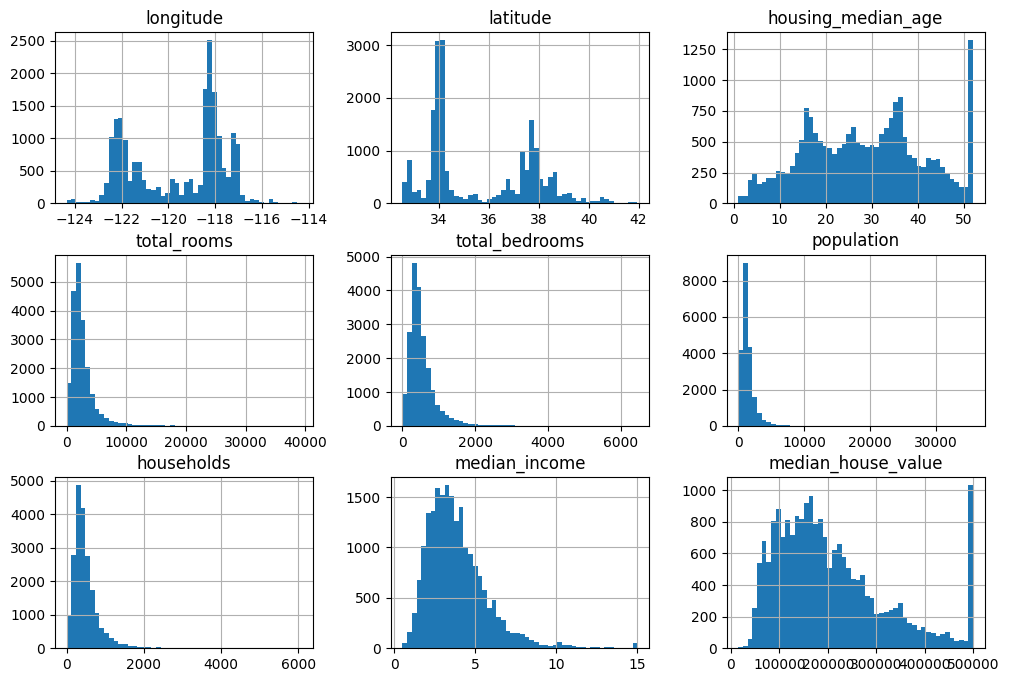

In [7]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

Note: Some features are skewed. Namely, "total_bedrooms", "total_rooms", "population", "households" and "median_income".

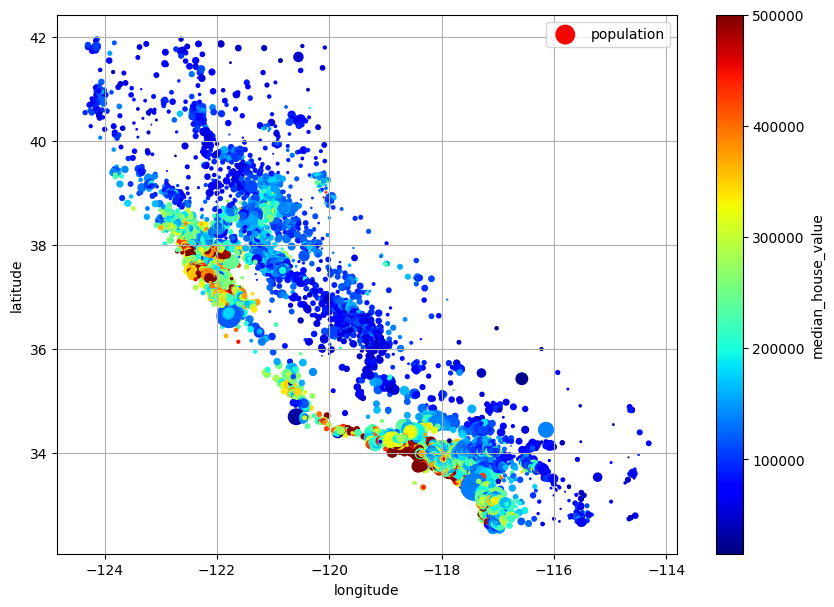

In [8]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=df["population"]/100, label="population", 
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
plt.show()

Note: The figure tells us that houses closer to the ocean have higher higher prices and population.

### Looking for Correlations

In [9]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

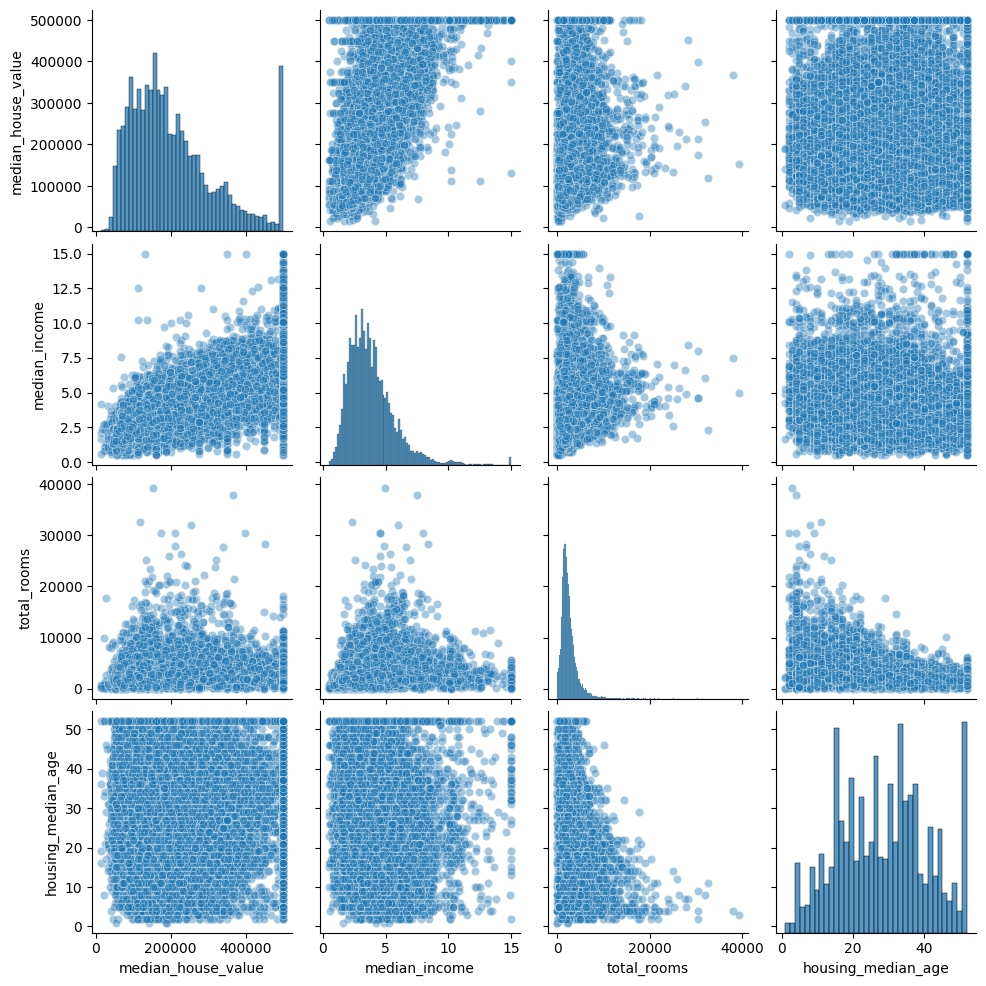

In [10]:
sns.pairplot(df[["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]], kind='scatter', plot_kws={'alpha': 0.4})
plt.show()

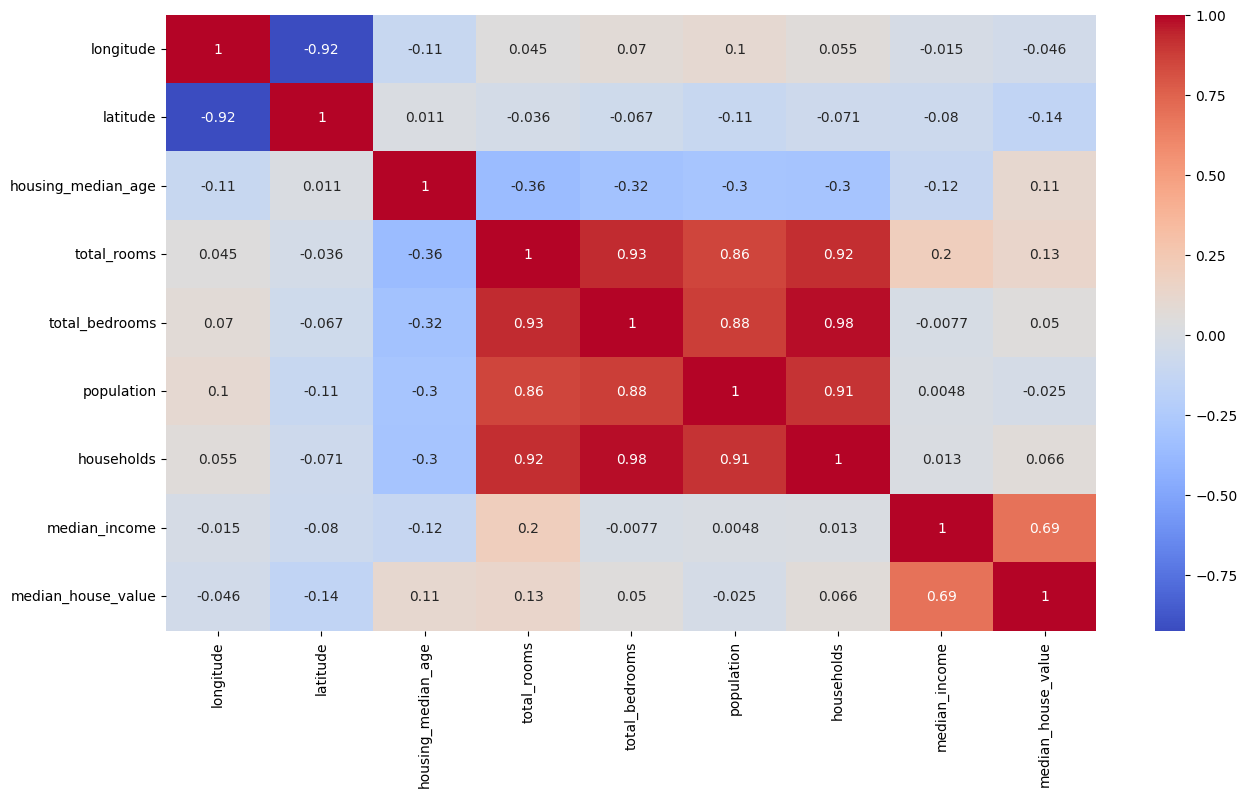

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Splitting The Data
I will split the data into test_set and train_set before going into feature engineering

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Experiment with Attribute Combinations

In [13]:
#Rooms per household
train_set["rooms_per_house"] = train_set["total_rooms"] / train_set["households"]

#Bedrooms to rooms ratio
train_set["bedrooms_ratio"] = train_set["total_bedrooms"] / train_set["total_rooms"]

#Population per hoousehold
train_set["people_per_house"] = train_set["population"] / train_set["households"]

In [14]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
rooms_per_house       0.158485
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
people_per_house     -0.022030
population           -0.026032
longitude            -0.046349
latitude             -0.142983
bedrooms_ratio       -0.257419
Name: median_house_value, dtype: float64

In [15]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## Constructing Pipelines

In [16]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
 "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer


# Computing ratio features that I experimented with above
def column_ratio(X):
     return X[:, [0]] / X[:, [1]]
    
def ratio_name(function_transformer, feature_names_in):
     return ["ratio"] 
    
def ratio_pipeline():
     return make_pipeline(
         SimpleImputer(strategy="median"),
         FunctionTransformer(column_ratio, feature_names_out=ratio_name),
         StandardScaler())

# Skewed features with their logarithm to make them more normally distributed
log_pipeline = make_pipeline(
                 SimpleImputer(strategy="median"),
                 FunctionTransformer(np.log, feature_names_out="one-to-one"),
                 StandardScaler())


default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
 StandardScaler())

#Pipeline for Categoical Columns
cat_pipeline = make_pipeline(
 SimpleImputer(strategy="most_frequent"),
 OneHotEncoder(handle_unknown="ignore"))


preprocessing = ColumnTransformer([
 ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
 ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
 ("people_per_house", ratio_pipeline(), ["population", "households"]),
 ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
 "households", "median_income"]),
 ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
 ],
 remainder=default_num_pipeline)

In [18]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x000002190A5ADEE0>,
                                                                      func=<function column_r...
                                                                      func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002190A9F0C50>)])

In [19]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()

## Select and Train a Model

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002190A9F0C50>)])),
                ('linearregression', LinearRegression())])

In [21]:
predictions = lin_reg.predict(X_train)
predictions[:5]

array([188672., 305088., 270592., 116096., 195776.])

In [22]:
y_train[:5].values

array([103000., 382100., 172600.,  93400.,  96500.])

In [23]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y_train, predictions,
                             squared=False)
lin_rmse

69359.62382138267

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002190A9F0C50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [25]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation to evaluate the decision tree model's performance using negative root mean squared error 
# as the scoring metric
tree_rmses = -cross_val_score(tree_reg, X_train, y_train,
     scoring="neg_root_mean_squared_error", cv=10)

In [26]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     68643.913474
std       2488.970782
min      64719.968867
25%      67029.839764
50%      68627.531858
75%      69927.075836
max      73088.933657
dtype: float64

This model did a little better than the previous one. But it is still not enough.

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                          RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

In [28]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49716.074276
std       2040.108404
min      46839.193565
25%      47831.390543
50%      49833.632670
75%      51406.523279
max      52725.711447
dtype: float64

#### Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
 {'random_forest__max_features': [4, 6, 8, 10]}
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
 scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002190A9F0C50>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [30]:
grid_search.best_params_

{'random_forest__max_features': 6}

In [31]:
forest_reg2 = grid_search.best_estimator_
forest_reg2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000021...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002190B10EAD0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [32]:
forest_rmses = -cross_val_score(forest_reg2, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

In [33]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     48563.473829
std       1727.499708
min      46055.408013
25%      47152.890720
50%      48788.099173
75%      50009.670952
max      50599.749835
dtype: float64

In [34]:
final_model = grid_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.11, 0.02, 0.02, 0.02, 0.02, 0.33, 0.01, 0.16, 0.  ,
       0.  , 0.  , 0.08, 0.07, 0.04])

The RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [35]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.33411013221286945, 'log__median_income'),
 (0.15834103000585784, 'cat__ocean_proximity_INLAND'),
 (0.10588602371588168, 'people_per_house__ratio'),
 (0.0754760216218357, 'remainder__longitude'),
 (0.0664536414391645, 'remainder__latitude'),
 (0.06510317071584454, 'bedrooms__ratio'),
 (0.06376671985791184, 'rooms_per_house__ratio'),
 (0.0411356396507562, 'remainder__housing_median_age'),
 (0.017807145864475245, 'log__population'),
 (0.017792750049961184, 'log__total_rooms'),
 (0.01650193442203987, 'log__total_bedrooms'),
 (0.01616472247529716, 'log__households'),
 (0.013277952916302566, 'cat__ocean_proximity_<1H OCEAN'),
 (0.004429752184415517, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0036084332103761448, 'cat__ocean_proximity_NEAR BAY'),
 (0.00014492965701067887, 'cat__ocean_proximity_ISLAND')]

## Evaluate System on the Test Set

In [36]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

In [37]:
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

48449.596378841576


In [38]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000021...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002190B10EAD0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [39]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']